# 第三节： 复杂坐标轴

很多情况下，论文中的图表并不一直是线性坐标系的单轴图，还需要掌握一些复杂坐标轴的绘制方法。比如对数、对数-对数坐标轴、多Y轴、图中图、子图

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体

## 3.1 坐标轴尺度

展示两个函数的对数坐标轴曲线：

(1) $y=log_{10}^t$

(2) $y=e^{t}$

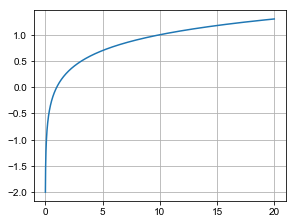

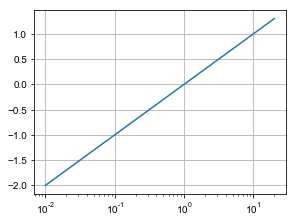

In [7]:
dt = 0.01
t = np.arange(dt, 20.0, dt)

y=np.log10(t)

# 线性坐标轴
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.plot(t,y)
ax.grid()
# save fig
plt.savefig('../../figures/Chapter1/plot_logt.pdf')

# x轴为对数
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.semilogx(t,y)
ax.grid()
# save fig
plt.savefig('../../figures/Chapter1/semilogx.pdf')

plt.show()

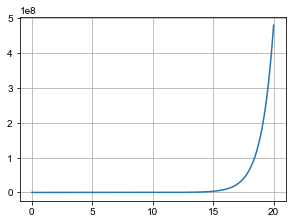

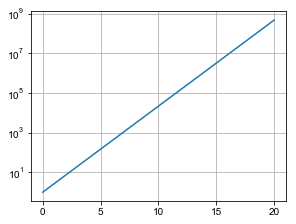

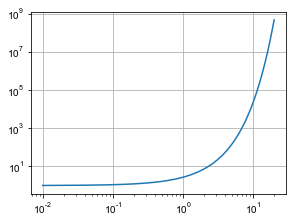

In [8]:
dt = 0.01
t = np.arange(dt, 20.0, dt)
y=np.exp(t)

# 线性坐标轴
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax=plt.gca()
ax.plot(t,y)
ax.grid()
# save fig
plt.savefig('../../figures/Chapter1/plot_10t.pdf')

# y轴为对数
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.semilogy(t,y)
ax.grid()
# save fig
plt.savefig('../../figures/Chapter1/semilogy.pdf')

# x，y轴均为对数
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.loglog(t,y)
ax.grid()
# save fig
plt.savefig('../../figures/Chapter1/loglog.pdf')

plt.show()

## 3.2 多纵轴
相同自变量(x)对应多个因变量(y1,y2,y2, ...)的情况，这些因变量表示不同的物理量，从而其变化范围也是不同的甚至是不同数量级的

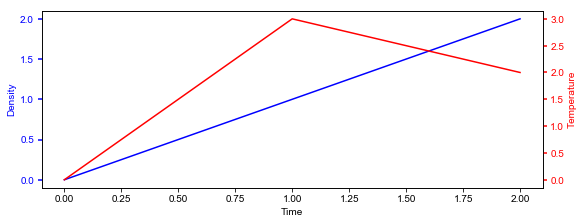

In [40]:
plt.figure(figsize=(8,3), constrained_layout='True')
ax=plt.gca()


# 1. 绘制每个物理量对应的曲线
p1, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")

# 2. 创建第二个（右边）Y轴，与第一个Y轴（左边）共享x轴
ax2=ax.twinx()
p2, = ax2.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")

# 3. 设置每个物理量对应y轴的label
ax.set_xlabel("Time")
ax.set_ylabel("Density")
ax2.set_ylabel("Temperature")

# 4. 设置每个y轴的颜色与对应的曲线颜色一致
ax.yaxis.label.set_color(p1.get_color())
ax2.yaxis.label.set_color(p2.get_color())

# 5. 设置坐标轴属性，可以使用字典批量设置(在第一章第二节中讲过)
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
ax2.tick_params(axis='y', colors=p2.get_color(), **tkw)

# # plt.legend()
# plt.legend(handles=(p1,p2),loc='upper left')


# save fig
plt.savefig('../../figures/Chapter1/multiY.pdf')
plt.show()

## 3.3 图中图

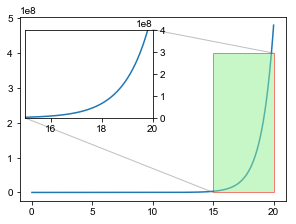

In [53]:
dt = 0.01
t = np.arange(dt, 20.0, dt)
y=np.exp(t)

# 1. 主图
plt.figure(figsize=(4,3), constrained_layout='True')
ax=plt.gca()
ax.plot(t,y)

# 2. 图中图
axin=ax.inset_axes([0.02,0.45,0.48,0.48]) # 括号内参数：x0,y0,w,h
# axin.xaxis.set_ticks([])
# axin.yaxis.set_ticks([])
axin.yaxis.set_ticks_position('right')
axin.plot(t,y)
axin.set_xlim(15,20)
axin.set_ylim(0,4E8)

# 3. 添加一个指示框
ax.indicate_inset_zoom(axin,fc='lightgreen',alpha=0.5,ec='red') #face color, edge color

# save fig
plt.savefig('../../figures/Chapter1/inset1_indicate.pdf')

plt.show()

## 3.4 子图

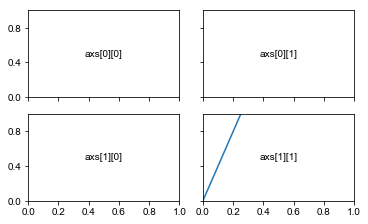

In [78]:
from matplotlib.ticker import MultipleLocator

# 1. 创建多行多列子图阵列
fig,axs=plt.subplots(2,2,sharex=True,sharey=True,constrained_layout=True,figsize=(5,3),
                     gridspec_kw={"width_ratios":[1,1],"height_ratios":[1,1],"hspace":0.1,"wspace":0.1}
                    )

# 2. ax的获取方式 axs[i][j]
for i in range(0,2):
    for j in range(0,2):
        axs[i][j].text(0.5,0.5,'axs['+str(i)+']'+'['+str(j)+']',va='center',ha='center')
        axs[i][j].xaxis.set_major_locator(MultipleLocator(0.2))
        axs[i][j].yaxis.set_major_locator(MultipleLocator(0.4))
        axs[i][j].set_xlim(0,1)
        axs[i][j].set_ylim(0,1)
axs[1][1].plot([0,1],[0,4])

# save fig
plt.savefig('../../figures/Chapter1/subplots1.pdf')

### 进阶：子图合并

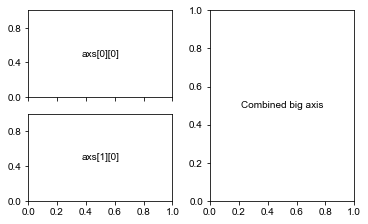

In [89]:
# 1. 创建子图阵列
fig,axs=plt.subplots(2,2,sharex=True,sharey=True,gridspec_kw={"width_ratios":[1,1],"height_ratios":[1,1]},
                         figsize=(5,3),constrained_layout=True)
for i in range(0,2):
    for j in range(0,2):
        axs[i][j].text(0.5,0.5,'axs['+str(i)+']'+'['+str(j)+']',va='center',ha='center')
        axs[i][j].xaxis.set_major_locator(MultipleLocator(0.2))
        axs[i][j].yaxis.set_major_locator(MultipleLocator(0.4))

# 2. 获取子图网格
gs=axs[0][0].get_gridspec()

# 3. 在子图网格范围内新建子图，比如第二列
axbig = fig.add_subplot(gs[:, 1])
axbig.xaxis.set_major_locator(MultipleLocator(0.2))
axbig.yaxis.set_major_locator(MultipleLocator(0.2))
axbig.text(0.5,0.5,'Combined big axis',va='center',ha='center')

# 4. 删除不用的坐标轴
axs[0][1].remove()
axs[1][1].remove()

# save fig
plt.savefig('../../figures/Chapter1/subplots1_combine.pdf')